# Exploratory Data Analysis of Medical No-Show Appointments in Python

### Pavan Josyula

#### June, 2020
<img src= "https://healthitanalytics.com/images/site/article_headers/_normal/ThinkstockPhotos-638236798.jpg"/>
<p>This exploratory data analysis project aims to explore a dataset containing aproximately 110k medical appointments from the Brazilian Public health system. It is basically divided into four sections: (1) <strong>Introduction</strong>, where the investigation problem is set and the dataset is described; (2) <strong>Data Wrangling</strong>, where the acquired data are cleaned and parsed; (3) <strong>Exploratory Data Analysis</strong>, in which some intuition about the data are built based on the found patterns; (4) <strong>Conclusion</strong>, where the found insights about the problem are reviewed and communicated. Although the main techniques involved in data analysis are applied, we highlight the use of heatmaps to gain insights regarding the study topic.</p>

Those readers not interested in the whole data analysis process may read <a href="#intro">Section 1</a>, to get familiar with the data and the investigation problem and then jump directly to <a href="#conclusions">Section 4</a> to find out the analysis results.

## Table of Contents
* <a href="#intro">1. Introduction</a>
  * <a href="#sec1.1"> 1.1. Initial statements </a>
  * <a href="#sec1.2"> 1.2. Understanding the data </a>
  * <a href="#sec1.3"> 1.3. Hypothesis to be explored </a>

* <a href="#wrangling">2. Data Wrangling</a>
  * <a href="#sec2.1"> 2.1. General properties </a>
  * <a href="#sec2.2"> 2.2. Numerical attributes and outliers</a>
    * <a href="#sec2.2.1"> PatientID</a>
    * <a href="#sec2.2.2"> AppointmentID</a>   
    * <a href="#sec2.2.3"> Checking the Age attribute</a>   
    * <a href="#sec2.2.4"> Checking the Handcap attribute</a>   
  * <a href="#sec2.3"> 2.3. Categorical attributes</a>
    * <a href="#sec2.3.1"> Gender attribute</a>   
    * <a href="#sec2.3.2"> Schedule and appointment date</a>
    * <a href="#sec2.3.3"> Waiting days</a>
    * <a href="#sec2.3.4"> Neighborhood names</a>
    * <a href="#sec2.3.5"> No-show class</a>
  * <a href="#sec2.4"> 2.4. Data wrangling overview</a>
  
* <a href="#eda">3. Exploratory Data Analysis</a>
  * <a href="#EDA_question1">3.1. Exploring no-showing appointments</a>
    * <a href="#sec3.1.1"> Waiting time between the scheduling and the appointment date </a>
    * <a href="#sec3.1.2"> A return to assiduity </a>
    * <a href="#sec3.1.3"> Neighborhood analysis </a>    
  * <a href="#EDA_question2">3.2. Exploring the patient profiles</a>

* <a href="#conclusions">4. Conclusions</a>
  * <a href="#sec4.1"> 4.1. Analysis limitations</a>
  * <a href="#sec4.2"> 4.2. Analysis overview</a>
* <a href="#references">References</a>

<a id='intro'></a>
## 1. Introduction

The Brazilian public health system, known as SUS for *Unified Health System* in its acronym in Portuguese, is one of the largest health system in the world <a href="#[1]">[1]</a>, representing government investment of more than 9% of GDP. However, its operation is not homogeneous and there are distinct perceptions of quality from citizens in different regions of the country.

This analysis will use the *no-show appointments dataset* which collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment, including a set of characteristics about the patient in each row:
- ‘ScheduledDay’: tells us on which day the patient set up their appointment.  
- ‘Neighborhood’: indicates the location of the hospital.  
- ‘Scholarship’: indicates whether or not the patient is enrolled in Brasilian welfare program called *Bolsa Família*.
- 'No-show': it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

This analysis aims to outline some possible reasons for patient no-showing at the scheduled appointments, as well as get insights about the Brazilian public health system. To accomplish this, we will first try to understand the data and the context on which they were collected. We will then proceed to data wrangling and exploratory data analysis, in an iterative process, in order to draw some conclusions about the subject.

<a id='sec1.1'></a>
### 1.1. Initial statements
This section sets up import statements for all the packages that will be used throughout this python notebook.</font>

In [1]:
pip install matplotlib==3.2.1

Note: you may need to restart the kernel to use updated packages.


In [2]:
#importing matplotlib package:
import matplotlib
#checking the version of the matplolib:
print(matplotlib.__version__)

3.2.1


In [3]:
# Data analysis packages:
import pandas as pd
import numpy as np
from datetime import datetime as dt

# Visualization packages:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='sec1.2'></a>
### 1.2. Understanding the data
Since the original dataset is available at Kaggle <a href="#[2]">[2]</a>, the first step was to get additional information available on its original repository, as transcripted below:

>In response here it goes: Country? Brazil. Is this from private or public service? Or both? Public Sector (Brazil). Primary, secondary, or tertiary care? Primary care, not sure about it. Only physicians? What would be the specialties? We don't have these information.
  
>First appointment with that specific professional? I believe first appointments are prone to "no show". That is a very good hint, we don't have that information yet. Part of the day? Early morning might be worse. (Perhaps in the next version we can include it.

Another relevant point is that any information is provided about the source of data. I.e., did these data come from a government agency or were they a compilation from each health unit? Furthermore, besides it is known the data is about public health unit, it is not said from which government sphere they belong to (municipal, state or federal). 
The absence of such information can result in a biased analysis, since the complex and decentralized Brazilian health system brings inevitable conflicts and contradictions between its associated entities, as identified in <a href="#[3]">[3]</a>.

This question regarding the data source was made at the Kaggle discussion forum (available at https://goo.gl/JB4P4d), on which the following answer were given: 
> This is at municipal level combining the appointments occurred in more then 45 units. As far as we know, the city has 20 million loss a year with no-shows. After so many studies happening in this data the average no-show now is 20%. Its important to mention that all services offered to the municipality were free of charge.

In order to define the hypotheses that will lead this analysis, it is first needed to know which information is available in the dataset (attributes). Thus, the first lines of the dataset are shown below:

In [4]:
pd.read_csv('Datasets/medical-app-noshow.csv').head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='sec1.3'></a>
### 1.3. Hypotheses to be explored

From the dataset information and its attributes, the following questions can be formulated:
* **Regarding the no-showing appointments**:
  - Do the patients forget the appointment?
  - What is the average waiting time between the scheduling date and the appointment date?
  
* **Regarding the patient profile**:
  - Is there any common characteristics among those patients that miss appointments?
  - What is the *missing appointments per patient* relation in the dataset?  
  - How many patients have missed an appointment at least once?
  - Are the patients suffering from serious illnesses more assiduous?

* **Regarding the health unit**:
  - What are the neighbourhoods with the highest no-showing rate?
  - Considering there are common characteristics among those who do not attend the appointments, how these characteristics are geographically distributed?
  
* **Regarding the data**:
  - Is the data balanced in relation to the interest class (showing/no-showing to appointments)?
  - How is the data distributed in relation to the location (neighborhood)? i.e., all the units have an equivalent and balanced number of instances?
  
The analysis conduced in the next sections will try to address some of these questions answering them based on the available dataset.

-------------

<a id='wrangling'></a>
## 2. Data Wrangling
In this section the data will be loaded and some operations will be performed to inspect data types, to look for missing values or possibly errant data. Data cleaning operations will be executed in the same section where a specific attribute is being analyzed.

<a id='sec2.1'></a>
### 2.1. General Properties

In [5]:
## Loading the dataset and printing out a few lines:
dataset = pd.read_csv('Datasets/medical-app-noshow.csv')
dataset.head(3)   #Printing the first three instances in the dataset

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [6]:
#Printing the last three instances in the dataset
dataset.tail(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [7]:
## Reading dataset general information:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


From the command above, it is possible to notice the dataset has no missing values, since all the attributes have 1,10,527 instances. However there is no guarantee these values are all consistent. <p>In the way to check it, the <code>pandas.describe()</code> method will be applied in the next section to gather information (*summary statistics*) from the numerical attributes.</p>

In [8]:
#Getting to know the datatypes of the attributes/columns:
dataset.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [9]:
#Counting the each datatype in the dataset:
dataset.dtypes.value_counts()

int64      8
object     5
float64    1
dtype: int64

From the above codes, we can understand that there are 8 integer type columns, 5 object type columns, 1 float type column present in the given dataset. 

<a id='sec2.2'></a>
### 2.2. Numerical attributes and outliers

In [10]:
## Describing the numerical attributes:
## Transposing the direction of the .describe() by chaining 'T'
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientId,110527.0,1.474963e+14,2.560949e+14,3.921784e+04,4.172614e+12,3.173184e+13,9.439172e+13,9.999816e+14
AppointmentID,110527.0,5.675305e+06,7.129575e+04,5.030230e+06,5.640286e+06,5.680573e+06,5.725524e+06,5.790484e+06
Age,110527.0,3.708887e+01,2.311020e+01,-1.000000e+00,1.800000e+01,3.700000e+01,5.500000e+01,1.150000e+02
Scholarship,110527.0,9.826558e-02,2.976748e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Hipertension,110527.0,1.972459e-01,3.979213e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Diabetes,110527.0,7.186479e-02,2.582651e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Alcoholism,110527.0,3.039981e-02,1.716856e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Handcap,110527.0,2.224796e-02,1.615427e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
SMS_received,110527.0,3.210256e-01,4.668727e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


Have you observed the <code>.describe()</code> generated *summary statistics* of all the numerical columns excluding the *object* type columns present in the dataset? <p> By default, it generates summary statistics only on the numerical columns (excluding the missing values, if present, in such type of columns). </p> <p>However, we can generate summary statistics on the *categorical* columns by specifying: <code>describe(include=np.object)</code> (or) <code>describe(include=pd.Categorical)</code> or <code>describe(include='object')</code>

In [11]:
dataset.describe(include=np.object).T

,count,unique,top,freq
Gender,110527,2,F,71840
ScheduledDay,110527,103549,2016-05-06T07:09:54Z,24
AppointmentDay,110527,27,2016-06-06T00:00:00Z,4692
Neighbourhood,110527,81,JARDIM CAMBURI,7717
No-show,110527,2,No,88208


In [12]:
dataset.describe(include=pd.Categorical).T

,count,unique,top,freq
Gender,110527,2,F,71840
ScheduledDay,110527,103549,2016-05-06T07:09:54Z,24
AppointmentDay,110527,27,2016-06-06T00:00:00Z,4692
Neighbourhood,110527,81,JARDIM CAMBURI,7717
No-show,110527,2,No,88208


In [13]:
dataset.describe(include='object').T

,count,unique,top,freq
Gender,110527,2,F,71840
ScheduledDay,110527,103549,2016-05-06T07:09:54Z,24
AppointmentDay,110527,27,2016-06-06T00:00:00Z,4692
Neighbourhood,110527,81,JARDIM CAMBURI,7717
No-show,110527,2,No,88208


<a id='sec2.2.1'></a>
#### 2.2.1 PatientID:
This attribute type is originally numerical *(float64 type)*. However, since it represents the patient identification, any numerical operations should not be applied to it and therefore, it will be transformed into a string type:

In [14]:
## Checking the attribute data type:
type(dataset['PatientId'][0])

numpy.float64

In [15]:
## Converting the values to int type and then to str type:
dataset['PatientId'] = dataset['PatientId'].apply(lambda x: str(int(x)));

## Verifying the datatype of the values in the column:
print("Verifying the datatype of 'PatientId' column values:\n{0}".format(type(dataset["PatientId"][0])))

Verifying the datatype of 'PatientId' column values:
<class 'str'>


In [16]:
## Counting how many unique patients are in the dataset:
print("Number of unique patients in the given dataset:\n{0}".format(dataset['PatientId'].nunique()))

print("\n")

## Determining the no. of appointments per patient:
size = dataset['PatientId'].size; unique_val = dataset['PatientId'].nunique()
app_per_patient = size/unique_val
print("Number of appointments per patient:\n{0}".format(round(app_per_patient,2)))

Number of unique patients in the given dataset:
62299


Number of appointments per patient:
1.77


Counting the unique values of this dataset attribute shows us how many unique patients we are dealing with. In this case, there are 62,299 patients which indicates that some patients had more than one appointment *(an average of 1.77 appointments per patient)*. 

<a id='sec2.2.2'></a>
#### 2.2.2 AppointmentID:
The same can be said for the *AppointmentID* attribute, which will also be transformed into a string type:

In [17]:
## Checking the attribute data type:
type(dataset['AppointmentID'][0])

numpy.int64

In [18]:
## Converting the values to int type and then to str type:
dataset['AppointmentID'] = dataset['AppointmentID'].apply(lambda x: str(int(x)));
## Checking the datatypes of the values in the column:
print("Verifying the datatypes of 'AppointmentID' column values:\n{0}".format(type(dataset['AppointmentID'][0])))

Verifying the datatypes of 'AppointmentID' column values:
<class 'str'>


In [19]:
## Counting how many unique appointment IDs of the patients are in the given dataset"
print("Number of unique patient appointment ID:\n{0}".format(dataset['AppointmentID'].nunique()))

Number of unique patient appointment ID:
110527


This attribute seems to be consistent: there are 110,527 instances in the dataset, as well as 110,527 unique values for the appointmentIDs. For last, since each instance corresponds to an appointment register, we will redefine the dataset index to the appointment IDs. 

In [20]:
dataset.set_index('AppointmentID', drop=True, inplace=True)

In [21]:
#Displaying the first 5 values in the dataset:
dataset.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
AppointmentID,,,,,,,,,,,,,
5642903,29872499824296,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
5642503,558997776694438,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
5642549,4262962299951,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
5642828,867951213174,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
5642494,8841186448183,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [22]:
#Checking the number of columns in the dataset:
print("Number of columns in the datset:\n{0}".format(dataset.columns.size))

Number of columns in the datset:
13


Initially there were 14 columns in the given dataset. Since the column **AppointmentID** has been transformed and set as the index column of the dataset, there are 13 number of columns present in the *dataset*.

<a id='sec2.2.3'></a>
#### 2.2.3. Checking the *Age* attribute:
It is not possible to be aged $-1$, as well as older than $100$ years calls some attention. The latter will be analyzed appropriately at the exploratory data analysis section, but ages under zero are definitely a mistake. In this case, we will first check how many instances correspond to this before treat them.

In [23]:
dataset[dataset['Age']<0]

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
AppointmentID,,,,,,,,,,,,,
5775010,465943158731293,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


Since there is just one occurrence, it will be removed from the dataset.

In [24]:
dataset.drop('5775010',inplace=True)  #Removing the erroneous instance

<a id='sec2.2.4'></a>
#### 2.2.4. Checking the *Handcap* attribute:
In the dataset metadata it is said that the *handcap* attribute should cointain a boolean value. However, as seen above, this attribute assumes values from 0 to 4, probably indicating the handicap number for each patient. In this analysis, we will map to 1 any value higher than 0.  

Also, there is a typo in the attribute name (it should be *handicap*) which will be corrected later.

In [25]:
dataset["Handcap"].nunique()

5

In [26]:
dataset["Handcap"].unique()

array([0, 1, 2, 3, 4])

In [27]:
## Converting all 'Handcap' values higher than 0 to 1:
dataset['Handcap'] = np.where(dataset['Handcap']>0, 1, 0)

<a id='sec2.3'></a>
### 2.3. Categorical attributes

In [28]:
## Getting information of the categorical attributes:
dataset.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
Index: 110526 entries, 5642903 to 5629448
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110526 non-null  object
 1   Gender          110526 non-null  object
 2   ScheduledDay    110526 non-null  object
 3   AppointmentDay  110526 non-null  object
 4   Neighbourhood   110526 non-null  object
 5   No-show         110526 non-null  object
dtypes: object(6)
memory usage: 5.9+ MB


<a id='sec2.3.1'></a>
####  2.3.1. *Gender* attribute:
Only two values are expected from this attribute. In order to check its consistency, the sum for both **M**ale and **F**emale classes must equal the total number of instances.

In [29]:
## Counting gender classes
dataset['Gender'].value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

Although the attribute data are consistent (the total sums 110,526 instances), they are unbalanced. Since each instance represents the appointment and not the patient, this fact can be treated in a further analysis.

<a id='sec2.3.2'></a>
####  2.3.2. Schedule and appointment date:
These two attributes are related to when the patient scheduled *(ScheduledDay)* and to which date he scheduled the appointment *(AppointmentDay)*. It is effort to notice, though, that the *AppointmentDay* has just the date information, while the *ScheduledDay* has both date and time information.  
In this section we will parse the data in order to find out how many days have passed between the schedule date and the appointment date. To get to it, we could use the python native datetime library. However, we choose to use the pandas methods for datetime processing <a href="#[4]">[4]</a>.

In [30]:
## Reading again the dataset first two lines to get acquainted with its content:
dataset.head(2)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
AppointmentID,,,,,,,,,,,,,
5642903,29872499824296,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
5642503,558997776694438,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


##### Parsing the date and time information:

In [31]:
## Converting the date information in string to datetime type:
dataset['ScheduledDay'] = pd.to_datetime(dataset.ScheduledDay)
dataset['AppointmentDay'] = pd.to_datetime(dataset.AppointmentDay)
## Creating a new column (attribute) containing just the scheduling time:
dataset['ScheduleTime'] = dataset['ScheduledDay'].dt.time
## Normalizing the "Day" columns to keep just the date information (dropping the time info)
dataset['ScheduledDay'] = dataset.ScheduledDay.dt.normalize()

In [32]:
#Displaying the first 5 rows of the dataset after the above transformation
display(dataset.head())

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduleTime
AppointmentID,,,,,,,,,,,,,,
5642903,29872499824296,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18:38:08
5642503,558997776694438,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16:08:27
5642549,4262962299951,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,16:19:04
5642828,867951213174,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17:29:31
5642494,8841186448183,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16:07:23


<a id='sec2.3.3'></a>
#### 2.3.3. Waiting days

A relevant information for this analysis is the waiting time, in days, between the scheduling date and the appointment date. To get to this, we will first have to parse the data through the following steps:*
* Create a "Waiting Days" column;
* Categorize these values in the context of this analysis;
* Insert the correspondent categories in the working dataset.

In [33]:
## Since both 'AppointmentDay' and 'ScheduledDay' are pandas.Timestamp type, this operation can be done directly:
dataset['WaitingDays'] = dataset['AppointmentDay'] - dataset['ScheduledDay']


#Displaying the dataframe after creating the new column "WaitingDays":
display(dataset.head())

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduleTime,WaitingDays
AppointmentID,,,,,,,,,,,,,,,
5642903,29872499824296,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18:38:08,0 days
5642503,558997776694438,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16:08:27,0 days
5642549,4262962299951,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,16:19:04,0 days
5642828,867951213174,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17:29:31,0 days
5642494,8841186448183,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16:07:23,0 days


At this point we must **check the data consistency** in relation to the scheduling and appointment times: if the new *WaitingDays* attribute has negative values, this indicates that the scheduling was performed after the appointment and such record should, therefore, be handled.  

To help further analysis, a function will be created to return a *time delta* type from a given number of days. 

In [34]:
type(dataset["WaitingDays"][0])

pandas._libs.tslibs.timedeltas.Timedelta

In [35]:
def waiting_days(days):
    '''Auxiliary function to parse a date information from string type to python datetime object.
    Syntax: waiting_days(days), where:
        days = int type with the number of days considered.
    Return: a correspondent pandas._libs.tslibs.timedeltas.Timedelta data type.
    '''
    arg = str(days) + ' days'
    return pd.to_timedelta(arg)

In [36]:
## Checking which instances were scheduled after the appointment:
dataset[dataset['WaitingDays'] < waiting_days(0)]

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduleTime,WaitingDays
AppointmentID,,,,,,,,,,,,,,,
5679978,7839272661752,M,2016-05-10 00:00:00+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,10:51:53,-1 days
5715660,7896293967868,F,2016-05-18 00:00:00+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,14:50:41,-1 days
5664962,24252258389979,F,2016-05-05 00:00:00+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,13:43:58,-1 days
5686628,998231581612122,F,2016-05-11 00:00:00+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,13:49:20,-6 days
5655637,3787481966821,M,2016-05-04 00:00:00+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,Yes,06:50:57,-1 days


Since few inconsistent instances have been found, they will be removed:

In [37]:
## Recording the inconsistent instances index 
dropIx = dataset[dataset['WaitingDays'] < waiting_days(0)].index
## Dropping these instances from the dataset:
dataset.drop(dropIx, inplace=True)

The latest operations return a *pandas.Timedelta* type. However, in order to analyze this data, we need first to get just the number of days using a native method from pandas library:

In [38]:
dataset['WaitingDays'] = dataset['WaitingDays'].dt.days  #Extract just the day value from the full "timedelta" object.

Now, making use of another dataframe, these data will be parsed appropriately making use of the *groupBy* method, which returns a *pandas.groupby object* with the selected attributes as index:

In [39]:
## Grouping by the 'WaitingDays' and 'No_show' values:
waitingdays = dataset.groupby(by=['WaitingDays','No-show'])

Since we are interested in the number of instances grouped either by 'WaitingDays' or by 'No_show' attributes, we will then use the <code>count()</code> method. To avoid redundancy we choose the 'PatientId' as reference, but it could be applied in any other attribute. We make use of the <code>unstack()</code> method to transform the hierarchical index as dataframe columns again.

In [40]:
waitingdays = waitingdays.count()['PatientId'].unstack()

In [41]:
display(waitingdays.head(10))

No-show,No,Yes
WaitingDays,,
0,36770.0,1792.0
1,4100.0,1113.0
2,5123.0,1602.0
3,2093.0,644.0
4,4059.0,1231.0
5,2405.0,872.0
6,3036.0,1001.0
7,3597.0,1309.0
8,1662.0,670.0


Since for a given number of waiting days there is no correspondent values for *No_show: Yes* or *No_show: No*, the last operation will result in a *NumPy.NaN* value. However, in order to be able to plot these data, we will replace those NaN for 0. We will also reset the index, moving its values to a new dataframe column:

In [42]:
waitingdays.fillna(value=0, inplace=True)
waitingdays.reset_index(drop=False, inplace=True)
waitingdays.info()
display(waitingdays)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   WaitingDays  129 non-null    int64  
 1   No           129 non-null    float64
 2   Yes          129 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.1 KB


No-show,WaitingDays,No,Yes
0,0,36770.0,1792.0
1,1,4100.0,1113.0
2,2,5123.0,1602.0
3,3,2093.0,644.0
4,4,4059.0,1231.0
...,...,...,...
124,155,4.0,6.0
125,162,9.0,2.0
126,169,7.0,1.0
127,176,10.0,6.0


The days some patients have to wait to be attended varies from 0 to 128. In order to enable a data analysis, we will categorize them as follow, using the *cut()* method as explained in <a href="#[5]">[5]</a>:

Waiting time   | Number of days
--- | ---
Same day | 0
Short | 1 - 3
Week | 4 - 7
Fortnight | 8 - 15
Month | 16 - 30
Quarter | 31 - 90
Semester | 91 - 180
Very long | > 180

In [43]:
## Defining the categories label:
categories = pd.Series(['Same day: 0', 'Short: 1-3', 'Week: 4-7', 'Fortnight: 8-15', 'Month: 16-30', 'Quarter: 31-90', 'Semester: 91-180', 'Very long: >180'])

In [44]:
type(waitingdays['WaitingDays'][0])

numpy.int64

In [45]:
waitingdays['WaitingDays'].hasnans

False

In [46]:
waitingdays['WaitingDays']

0        0
1        1
2        2
3        3
4        4
      ... 
124    155
125    162
126    169
127    176
128    179
Name: WaitingDays, Length: 129, dtype: int64

In [47]:
## Applying these categories both to the auxiliary and to the working datasets:
waitingdays['WaitingDays'] = pd.cut(waitingdays.WaitingDays, bins = [-1,0,3,7,15,30,90,180, 10000], labels=categories)
dataset['WaitingCategories'] = pd.cut(dataset.WaitingDays, bins = [-1,0,3,7,15,30,90,180, 10000], labels=categories)


In [48]:
display(dataset.head())

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduleTime,WaitingDays,WaitingCategories
AppointmentID,,,,,,,,,,,,,,,,
5642903,29872499824296,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18:38:08,0,Same day: 0
5642503,558997776694438,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16:08:27,0,Same day: 0
5642549,4262962299951,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,16:19:04,0,Same day: 0
5642828,867951213174,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17:29:31,0,Same day: 0
5642494,8841186448183,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16:07:23,0,Same day: 0


In [49]:
display(waitingdays.head())

No-show,WaitingDays,No,Yes
0,Same day: 0,36770.0,1792.0
1,Short: 1-3,4100.0,1113.0
2,Short: 1-3,5123.0,1602.0
3,Short: 1-3,2093.0,644.0
4,Week: 4-7,4059.0,1231.0


The categorized waiting days information was updated in the main dataset. However, it would be useful to parse the auxiliary dataset (*waitingdays*) in order to find out how the no-showing rate is distributed among the waiting categories.

In [50]:
## Grouping the dataset by the waiting categories, returning the sum of all instances:
waitingdays = waitingdays.groupby('WaitingDays').sum()
display(waitingdays)

No-show,No,Yes
WaitingDays,,
Same day: 0,36770.0,1792.0
Short: 1-3,11316.0,3359.0
Week: 4-7,13097.0,4413.0
Fortnight: 8-15,9362.0,4166.0
Month: 16-30,10709.0,5159.0
Quarter: 31-90,6792.0,3369.0
Semester: 91-180,161.0,56.0
Very long: >180,0.0,0.0


In [51]:
## Creating a new attribute, "No-showing rate", relating how many patients did not show up against those who did.
waitingdays['No-showing rate'] = (waitingdays.Yes / waitingdays.No)*100

In [52]:
## Viewing the resulting dataset:
waitingdays

No-show,No,Yes,No-showing rate
WaitingDays,,,
Same day: 0,36770.0,1792.0,4.873538
Short: 1-3,11316.0,3359.0,29.683634
Week: 4-7,13097.0,4413.0,33.694739
Fortnight: 8-15,9362.0,4166.0,44.499039
Month: 16-30,10709.0,5159.0,48.174433
Quarter: 31-90,6792.0,3369.0,49.602473
Semester: 91-180,161.0,56.0,34.782609
Very long: >180,0.0,0.0,NaN


<a id='sec2.3.4'></a>
#### 2.3.4. *Neighborhood* names
According to the dataset description, this attributes refers to the neighborhoods the health units are located in the city of *Vitória*, in the State of *Espírito Santo*, Brazil.

In [53]:
## Checking the unique neighborhood names:
neighborhood = dataset.Neighbourhood.unique()
neighborhood.sort()  #Sorting the names in alphabetical order
neighborhood  #Showing the results

array(['AEROPORTO', 'ANDORINHAS', 'ANTÔNIO HONÓRIO',
       'ARIOVALDO FAVALESSA', 'BARRO VERMELHO', 'BELA VISTA',
       'BENTO FERREIRA', 'BOA VISTA', 'BONFIM', 'CARATOÍRA', 'CENTRO',
       'COMDUSA', 'CONQUISTA', 'CONSOLAÇÃO', 'CRUZAMENTO', 'DA PENHA',
       'DE LOURDES', 'DO CABRAL', 'DO MOSCOSO', 'DO QUADRO',
       'ENSEADA DO SUÁ', 'ESTRELINHA', 'FONTE GRANDE', 'FORTE SÃO JOÃO',
       'FRADINHOS', 'GOIABEIRAS', 'GRANDE VITÓRIA', 'GURIGICA', 'HORTO',
       'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MARIA', 'ILHA DO BOI',
       'ILHA DO FRADE', 'ILHA DO PRÍNCIPE', 'ILHAS OCEÂNICAS DE TRINDADE',
       'INHANGUETÁ', 'ITARARÉ', 'JABOUR', 'JARDIM CAMBURI',
       'JARDIM DA PENHA', 'JESUS DE NAZARETH', 'JOANA D´ARC',
       'JUCUTUQUARA', 'MARIA ORTIZ', 'MARUÍPE', 'MATA DA PRAIA',
       'MONTE BELO', 'MORADA DE CAMBURI', 'MÁRIO CYPRESTE', 'NAZARETH',
       'NOVA PALESTINA', 'PARQUE INDUSTRIAL', 'PARQUE MOSCOSO', 'PIEDADE',
       'PONTAL DE CAMBURI', 'PRAIA DO CANTO', 'PRAIA DO SUÁ',

In [54]:
#Number of unique neighborhoods present in the dataset:
print("Number of neighbourhoods present in the given dataset:\n{}".format(neighborhood.size))

Number of neighbourhoods present in the given dataset:
81


Considering "ILHAS OCEÂNICAS DE TRINDADE" is not an official neighborhood of *Vitória* <a href="#[8]">[8]</a>, the two instances related to them will be dropped off. 

In [55]:
dataset.drop(dataset[dataset['Neighbourhood'] == 'ILHAS OCEÂNICAS DE TRINDADE'].index, inplace=True)

In [56]:
## Counting again the neighborhood number:
neighborhood = dataset.Neighbourhood.unique()
neighborhood.sort()

In [57]:
## Counting neighborhood:
print("Number of neighbourhoods after dropping off the above are:\n{}".format(neighborhood.size))

Number of neighbourhoods after dropping off the above are:
80


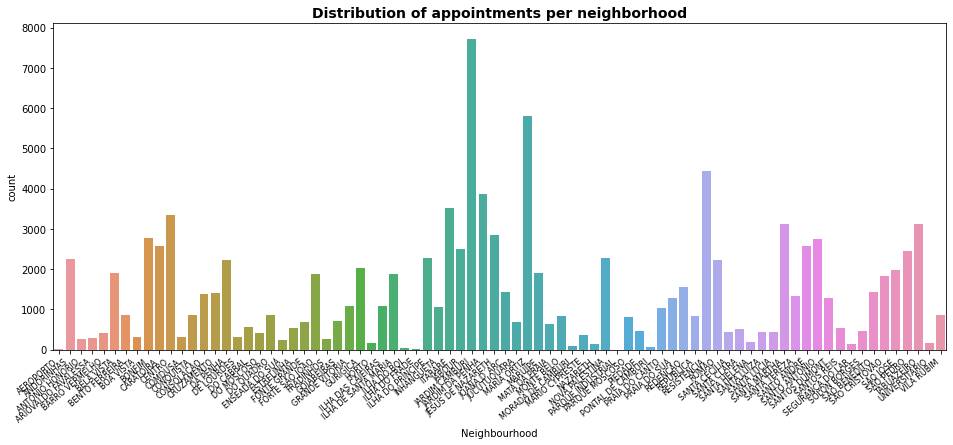

In [58]:
## Plotting an histogram with the neighborhoods sorted alphabetically. 
plt.figure(figsize=(16,6))
ax = sns.countplot(x='Neighbourhood', data=dataset, order=neighborhood)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=8)
plt.title('Distribution of appointments per neighborhood', fontsize=14, fontweight='bold')
plt.show()

From the graph above, it can be noticed there are 81 different neighborhood being considered, where 8 of them register more than 3k appointments. However, in the data description (see <a href="#intro">Section 1</a>) it is said there are 45 health units, which leads us to consider the neighborhood as where the patient lives.  

Due to this, EDA involving the neighborhood must be carried out in a careful manner.

<a id='sec2.3.5'></a>
####  2.3.5. *No-show* class:
We want to check wheter the class values are consistent with the expected values for this database (true or false).

In [59]:
## Counting gender classes
dataset['No-show'].value_counts()

No     88207
Yes    22312
Name: No-show, dtype: int64

The total sum is consistent with the dataset length. However, as it was also noticed for the *Gender* attribute, this data are unbalanced, i.e. there are more instances pertaining to one class than other. Since this attribute represents our dataset categorization, this fact becomes more relevant for the further analysis. In other words, although we can get some useful insights from this data, we must be careful when applying this dataset to training machine learning algorithms and so on. 

<a id='sec2.4'></a>
### 2.4. Data wrangling overview

Just in order to help its reading, the dataset attributes will be rearranged to put all the date and time information together, as well as correcting the typos in the attribute names:

In [60]:
## Reading the dataset attributes (columns):
dataset.columns

Index(['PatientId', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age',
       'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'No-show', 'ScheduleTime',
       'WaitingDays', 'WaitingCategories'],
      dtype='object')

In [61]:
dataset = dataset.reindex(columns=['PatientId', 'Gender', 'Age', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'ScheduledDay', 'ScheduleTime', 'AppointmentDay', 'WaitingDays', 'WaitingCategories', 'SMS_received', 
       'Neighbourhood', 'No-show'])

In [62]:
## Reading again the current attribute labels:
dataset.columns

Index(['PatientId', 'Gender', 'Age', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'ScheduledDay', 'ScheduleTime',
       'AppointmentDay', 'WaitingDays', 'WaitingCategories', 'SMS_received',
       'Neighbourhood', 'No-show'],
      dtype='object')

In [63]:
## Renaming "No-show"to "No_show"; "Hipertension": "Hypertension" "Handcap" to "Handicap"; and "ScheduleTime" to "ScheduledTime":
dataset.columns = ['PatientId', 'Gender', 'Age', 'Scholarship', 'Hypertension', 'Diabetes',
       'Alcoholism', 'Handicap', 'ScheduledDay', 'ScheduledTime', 'AppointmentDay', 'WaitingDays', 
       'WaitingCategories', 'SMS_received', 'Neighbourhood', 'No_show']

We then conclude this data wrangling step by showing an overview of the pre-processed data, i.e. the data after the wrangling and cleansing process. 

In [64]:
## Checking again the dataset information (for numerical attributes) and description (for categorical ones):
print(dataset.info())
dataset.describe().T

<class 'pandas.core.frame.DataFrame'>
Index: 110519 entries, 5642903 to 5629448
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   PatientId          110519 non-null  object             
 1   Gender             110519 non-null  object             
 2   Age                110519 non-null  int64              
 3   Scholarship        110519 non-null  int64              
 4   Hypertension       110519 non-null  int64              
 5   Diabetes           110519 non-null  int64              
 6   Alcoholism         110519 non-null  int64              
 7   Handicap           110519 non-null  int64              
 8   ScheduledDay       110519 non-null  datetime64[ns, UTC]
 9   ScheduledTime      110519 non-null  object             
 10  AppointmentDay     110519 non-null  datetime64[ns, UTC]
 11  WaitingDays        110519 non-null  int64              
 12  WaitingCategories  110519 no

,count,mean,std,min,25%,50%,75%,max
Age,110519.0,37.089071,23.109970,0.0,18.0,37.0,55.0,115.0
Scholarship,110519.0,0.098273,0.297684,0.0,0.0,0.0,0.0,1.0
Hypertension,110519.0,0.197260,0.397932,0.0,0.0,0.0,0.0,1.0
Diabetes,110519.0,0.071870,0.258274,0.0,0.0,0.0,0.0,1.0
Alcoholism,110519.0,0.030402,0.171692,0.0,0.0,0.0,0.0,1.0
Handicap,110519.0,0.020259,0.140885,0.0,0.0,0.0,0.0,1.0
WaitingDays,110519.0,10.184005,15.255082,0.0,0.0,4.0,15.0,179.0
SMS_received,110519.0,0.321049,0.466882,0.0,0.0,0.0,1.0,1.0


In [65]:
## Visualizing few instances of the data:
dataset.head(3)

,PatientId,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,ScheduledDay,ScheduledTime,AppointmentDay,WaitingDays,WaitingCategories,SMS_received,Neighbourhood,No_show
AppointmentID,,,,,,,,,,,,,,,,
5642903,29872499824296,F,62,0,1,0,0,0,2016-04-29 00:00:00+00:00,18:38:08,2016-04-29 00:00:00+00:00,0,Same day: 0,0,JARDIM DA PENHA,No
5642503,558997776694438,M,56,0,0,0,0,0,2016-04-29 00:00:00+00:00,16:08:27,2016-04-29 00:00:00+00:00,0,Same day: 0,0,JARDIM DA PENHA,No
5642549,4262962299951,F,62,0,0,0,0,0,2016-04-29 00:00:00+00:00,16:19:04,2016-04-29 00:00:00+00:00,0,Same day: 0,0,MATA DA PRAIA,No


As it can be seen, the numerical attributes are consistent with the expected values (i.e. counting 110.519 values, with a minimum of 0 and maximum value of 1 to the boolean attributes, while in a range from 0 to 115 for the age attribute). In the same way, the categorical attributes are as expected.

-------------

<a id='eda'></a>
## 3. Exploratory Data Analysis

Once the data were trimmed and cleaned, we will move on to explore the questions posed on  <a href="#sec1.3">Section 1.3</a>. Besides it was identified in <a href="#wrangling">Section 2</a> that data are unbalanced, it will not be taken into account in the following analysis. Given the dataset limitations, this analysis will address the first two questions, as organized in the following topics::  

* **<a href="#EDA_question1">3.1. Exploring no-showing appointments</a>**
* **<a href="#EDA_question2">3.2. Exploring the patient profiles</a>**

Some functions will be defined below in order to facilitate the further analyzing process.

In [66]:
def get_statistics(data, bins=20):
    '''Prints basic statistics from the input data. 
    Syntax: get_statistics(data, bins=20), where:
        data = the input data series;
        bins = the number of bins to the histogram.
    '''
    total = data.values
    print('Mean:', np.mean(total))
    print('Standard deviation:', np.std(total))
    print('Variance:', np.var(total))
    print('Minimum:', np.min(total))
    print('Maximum:', np.max(total))
    print('Median:', np.median(total))
    plt.hist(data, bins=bins)

In [67]:
def get_total(dataframe):
    '''Return the total sum of each numerical attribute of a pandas.Dataframe.'''
    return dataframe.sum(axis=1)

In [68]:
def df_row_normalize(dataframe):
    '''Normalizes the values of a given pandas.Dataframe by the total sum of each line.
    Algorithm based on https://stackoverflow.com/questions/26537878/pandas-sum-across-columns-and-divide-each-cell-from-that-value'''
    return dataframe.div(dataframe.sum(axis=1), axis=0)

In [69]:
def df_column_normalize(dataframe, percent=False):
    '''Normalizes the values of a given pandas.Dataframe by the total sum of each column.
    If percent=True, multiplies the final value by 100.
    Algorithm based on https://stackoverflow.com/questions/26537878/pandas-sum-across-columns-and-divide-each-cell-from-that-value'''
    if percent:
        return dataframe.div(dataframe.sum(axis=0), axis=1)*100
    else:
        return dataframe.div(dataframe.sum(axis=0), axis=1)

<a id='EDA_question1'></a>
### 3.1. Exploring the *no-showing appointments*
In this section we will seek to answer the following questions based on the available data:  
* What is the average waiting time between the scheduling date and the appointment date?
* Is there any relation between the waiting time and the no-showing appointments?
* How the *no-showing appointments* are distributed among the health units (neighborhood)?

In orther to find the answers, we will now focus on those attributes related specifically to appointments: *patient ID; scheduled date; appointment date; and health unit neighborhood*, as well as those attributes resulting from these.

<a id='sec3.1.1'></a>
#### 3.1.1. Waiting time between the scheduling and the appointment date
To get an overall idea of the no-showing appointments, we will start analyzing the basic statistics of the waiting days:

Mean: 10.18400456030185
Standard deviation: 15.255012525530072
Variance: 232.7154071540794
Minimum: 0
Maximum: 179
Median: 4.0


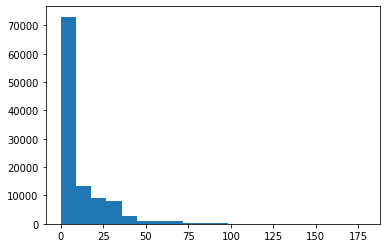

In [70]:
get_statistics(dataset.WaitingDays, bins = 20)

The **average waiting is about 10 days**, with a standard deviation of approximately 15 days. These values suggest that this distribution is not normal, since the mean is not in the center, as confirmed by its histogram. The distribution of the *WaitingDays* is right-skewed.

Looking back at the *WaitingDays* dataframe created in <a href="#sec2.3.3">Section 2.3.3</a>, we can compare the no-showing rate (i.e. the number of patients that missed the appointment against those who attended) in relation to each of *WaitingDays* categories.

In [71]:
## Showing the data again:
waitingdays

No-show,No,Yes,No-showing rate
WaitingDays,,,
Same day: 0,36770.0,1792.0,4.873538
Short: 1-3,11316.0,3359.0,29.683634
Week: 4-7,13097.0,4413.0,33.694739
Fortnight: 8-15,9362.0,4166.0,44.499039
Month: 16-30,10709.0,5159.0,48.174433
Quarter: 31-90,6792.0,3369.0,49.602473
Semester: 91-180,161.0,56.0,34.782609
Very long: >180,0.0,0.0,NaN


This data could be better understood graphically. To do so, we will first manipulate the *waitingdays* dataframe in
order to get the percentual information. We will also multiply by *500* the *No-showing rate* values in order to put this attribute in the same scale of the chart. For last, we will show all these information in the same chart, based on the codes proposed in <a href="#[6]">[6]</a> and <a href="#[7]">[7]</a>.

In [72]:
## Adjusting the dataframe:
eda_waitingDays = waitingdays.copy()  #Copying the dataframe from Section 2.3.3
eda_waitingDays.reset_index(drop=False, inplace=True)  #Making the index as a column in order to be plotted.
eda_waitingDays.drop(7, inplace=True)  #Droppping the last row, since it's empty.

## Adding new columns:
#Transforming the 'No-showing rate' into strings with the percentual values:
eda_waitingDays['No-show percentual'] = eda_waitingDays['No-showing rate'].apply(lambda x: '{0}%'.format(round(x,2)))
#Multiplying the rate values by 500 times in order to be plotted in the same scale:
eda_waitingDays['No-showing rate (500x)'] = eda_waitingDays['No-showing rate']*500

## Showing the adjusting dataframe:
eda_waitingDays

No-show,WaitingDays,No,Yes,No-showing rate,No-show percentual,No-showing rate (500x)
0,Same day: 0,36770.0,1792.0,4.873538,4.87%,2436.769105
1,Short: 1-3,11316.0,3359.0,29.683634,29.68%,14841.816896
2,Week: 4-7,13097.0,4413.0,33.694739,33.69%,16847.369627
3,Fortnight: 8-15,9362.0,4166.0,44.499039,44.5%,22249.519333
4,Month: 16-30,10709.0,5159.0,48.174433,48.17%,24087.216360
5,Quarter: 31-90,6792.0,3369.0,49.602473,49.6%,24801.236749
6,Semester: 91-180,161.0,56.0,34.782609,34.78%,17391.304348


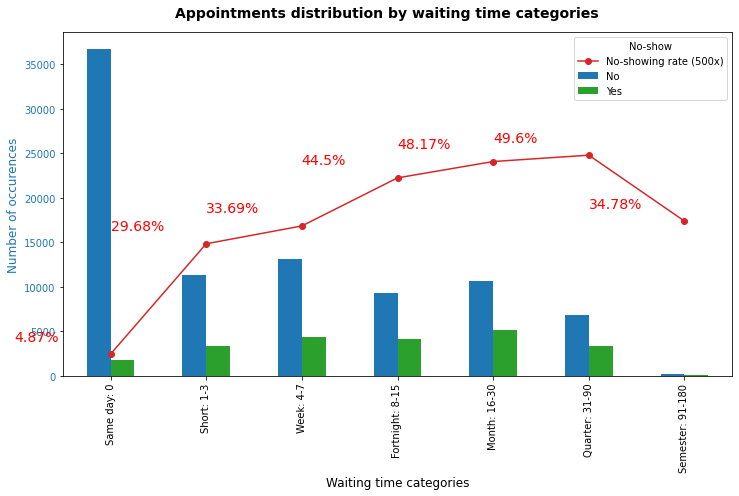

In [73]:
## Setting the graph parameters:
fig1, ax = plt.subplots(figsize=[12,6])  #Defines the graph window size
fig1.subplots_adjust(top=0.92)
plt.suptitle('Appointments distribution by waiting time categories', fontsize=14, fontweight='bold')

colors = ['tab:blue', 'tab:green', 'tab:red']  #Defines the colors to be used

ax.set_ylabel('Number of occurences', color=colors[0], fontsize=12)  #Set the y-axis color and label
ax.tick_params(axis='y', labelcolor=colors[0])

## Plotting the line chart:
eda_waitingDays[['WaitingDays', 'No-showing rate (500x)']].plot(x='WaitingDays', linestyle='-', marker='o', ax=ax, color=colors[2])
#Setting the line chart marker labels
x = ax.get_xticks()  #Getting the x-axis ticks to plot the label
for a,b,c in zip(x,eda_waitingDays['No-showing rate (500x)'], eda_waitingDays['No-show percentual']):
    plt.text(a,b+1500,c, color='red', fontsize=14)
    
## Plotting the bar chart:
eda_waitingDays[['WaitingDays', 'No', 'Yes']].plot(x='WaitingDays', kind='bar', ax=ax, color=colors[0:2])

ax.set_xlabel('Waiting time categories', fontsize=12)  #Set the y-axis color and label

plt.show()

Through the chart above, it becomes evident that **the *no-showing rate* increases as the waiting gets longer**. It reaches the lower rates when the attendance occurs in the same day it was scheduled. We can then associate it with the emergency care or even when the patient goes to the health unit without previous scheduling.  

It is curious to notice that after one quarter waiting there is a slight return to the patient assiduity, when the *no-showing rate* downs from *49.6%* to *34.78%*. This question will be explored deeply in the next section.

<a id='sec3.1.2'></a>
#### 3.1.2. A return to assiduity
As noted in the chart above, the *no-showing rate* increases along the waiting time, however it starts to decrease after one quarter waiting. To get insights for the next analysis (the patient profiles will be explored in <a href="EDA_question2">Section 3.2</a>), we will now compare some basic statistics of the numerical attributes from the group patients attending to the appointments in the same day **(Group I)** and after one quarter **(Group II)**. 

In [74]:
## Group I - Describing the numerical attributes for the same day appointments:
group_I = dataset[dataset['WaitingCategories'] == 'Same day: 0'].describe()
group_I.T

,count,mean,std,min,25%,50%,75%,max
Age,38562.0,34.452311,23.221671,0.0,15.0,34.0,52.0,115.0
Scholarship,38562.0,0.108656,0.311211,0.0,0.0,0.0,0.0,1.0
Hypertension,38562.0,0.175536,0.380429,0.0,0.0,0.0,0.0,1.0
Diabetes,38562.0,0.066542,0.249231,0.0,0.0,0.0,0.0,1.0
Alcoholism,38562.0,0.039884,0.195689,0.0,0.0,0.0,0.0,1.0
Handicap,38562.0,0.024169,0.153575,0.0,0.0,0.0,0.0,1.0
WaitingDays,38562.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
SMS_received,38562.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [75]:
## Group II - Describing the numerical attributes for the short appointments:
group_II = dataset[dataset['WaitingCategories']=='Short: 1-3'].describe()
group_II.T

,count,mean,std,min,25%,50%,75%,max
Age,14675.0,42.527905,22.968113,0.0,24.0,45.0,60.0,115.0
Scholarship,14675.0,0.080750,0.272459,0.0,0.0,0.0,0.0,1.0
Hypertension,14675.0,0.266099,0.441932,0.0,0.0,0.0,1.0,1.0
Diabetes,14675.0,0.105894,0.307713,0.0,0.0,0.0,0.0,1.0
Alcoholism,14675.0,0.028143,0.165387,0.0,0.0,0.0,0.0,1.0
Handicap,14675.0,0.025486,0.157600,0.0,0.0,0.0,0.0,1.0
WaitingDays,14675.0,1.831278,0.716453,1.0,1.0,2.0,2.0,3.0
SMS_received,14675.0,0.061738,0.240687,0.0,0.0,0.0,0.0,1.0


In [76]:
## Group III - Describing the numerical attributes for the 'week' appointments:
group_III = dataset[dataset['WaitingCategories']=='Week: 4-7'].describe()
group_III.T

,count,mean,std,min,25%,50%,75%,max
Age,17510.0,39.812450,22.552289,0.0,21.0,40.0,57.0,97.0
Scholarship,17510.0,0.094860,0.293030,0.0,0.0,0.0,0.0,1.0
Hypertension,17510.0,0.232039,0.422146,0.0,0.0,0.0,0.0,1.0
Diabetes,17510.0,0.085151,0.279115,0.0,0.0,0.0,0.0,1.0
Alcoholism,17510.0,0.030668,0.172422,0.0,0.0,0.0,0.0,1.0
Handicap,17510.0,0.019303,0.137593,0.0,0.0,0.0,0.0,1.0
WaitingDays,17510.0,5.488806,1.189347,4.0,4.0,6.0,7.0,7.0
SMS_received,17510.0,0.607767,0.488262,0.0,0.0,1.0,1.0,1.0


In [77]:
## Group IV - Describing the numerical attributes for the 'fortnight' appointments:
group_IV = dataset[dataset['WaitingCategories']=="Fortnight: 8-15"].describe()
group_IV.T

,count,mean,std,min,25%,50%,75%,max
Age,13528.0,35.441085,22.382448,0.0,17.0,34.0,53.0,115.0
Scholarship,13528.0,0.115464,0.319593,0.0,0.0,0.0,0.0,1.0
Hypertension,13528.0,0.186059,0.389168,0.0,0.0,0.0,0.0,1.0
Diabetes,13528.0,0.065420,0.247274,0.0,0.0,0.0,0.0,1.0
Alcoholism,13528.0,0.025577,0.157874,0.0,0.0,0.0,0.0,1.0
Handicap,13528.0,0.015597,0.123916,0.0,0.0,0.0,0.0,1.0
WaitingDays,13528.0,11.564237,2.471097,8.0,9.0,12.0,14.0,15.0
SMS_received,13528.0,0.585970,0.492572,0.0,0.0,1.0,1.0,1.0


In [78]:
## Group V - Describing the numerical attributes for the 'month' appointments:
group_V = dataset[dataset['WaitingCategories']=='Month: 16-30'].describe()
group_V.T

,count,mean,std,min,25%,50%,75%,max
Age,15866.0,36.171121,22.638530,0.0,18.0,36.0,54.0,100.0
Scholarship,15866.0,0.098386,0.297846,0.0,0.0,0.0,0.0,1.0
Hypertension,15866.0,0.182277,0.386084,0.0,0.0,0.0,0.0,1.0
Diabetes,15866.0,0.058679,0.235030,0.0,0.0,0.0,0.0,1.0
Alcoholism,15866.0,0.022186,0.147292,0.0,0.0,0.0,0.0,1.0
Handicap,15866.0,0.015883,0.125027,0.0,0.0,0.0,0.0,1.0
WaitingDays,15866.0,22.728035,4.340107,16.0,19.0,22.0,27.0,30.0
SMS_received,15866.0,0.604878,0.488892,0.0,0.0,1.0,1.0,1.0


In [79]:
## Group VI - Describing the numerical attributes for the quarter appointments:
group_VI = dataset[dataset['WaitingCategories']=='Quarter: 31-90'].describe()
display(group_VI.T)

,count,mean,std,min,25%,50%,75%,max
Age,10161.0,37.669029,23.323681,0.0,18.0,38.0,56.0,115.0
Scholarship,10161.0,0.067710,0.251260,0.0,0.0,0.0,0.0,1.0
Hypertension,10161.0,0.151363,0.358420,0.0,0.0,0.0,0.0,1.0
Diabetes,10161.0,0.047928,0.213625,0.0,0.0,0.0,0.0,1.0
Alcoholism,10161.0,0.016829,0.128637,0.0,0.0,0.0,0.0,1.0
Handicap,10161.0,0.011515,0.106692,0.0,0.0,0.0,0.0,1.0
WaitingDays,10161.0,45.187777,14.122557,31.0,34.0,40.0,55.0,90.0
SMS_received,10161.0,0.617164,0.486103,0.0,0.0,1.0,1.0,1.0


In [80]:
## Group VII - Describing the numerical attributes for the semester appointments:
group_VII = dataset[dataset['WaitingCategories']=="Semester: 91-180"].describe()
group_VII.T

,count,mean,std,min,25%,50%,75%,max
Age,217.0,60.788018,25.672460,0.0,48.0,69.0,80.0,95.0
Scholarship,217.0,0.064516,0.246238,0.0,0.0,0.0,0.0,1.0
Hypertension,217.0,0.539171,0.499616,0.0,0.0,1.0,1.0,1.0
Diabetes,217.0,0.133641,0.341052,0.0,0.0,0.0,0.0,1.0
Alcoholism,217.0,0.013825,0.117034,0.0,0.0,0.0,0.0,1.0
Handicap,217.0,0.069124,0.254252,0.0,0.0,0.0,0.0,1.0
WaitingDays,217.0,121.410138,31.423518,91.0,91.0,109.0,155.0,179.0
SMS_received,217.0,0.640553,0.480948,0.0,0.0,1.0,1.0,1.0


In [81]:
# Comparing the mean of the numerical atrributes such as Age of groups 1 & 7:
grp_diff71 = group_VII.loc['mean'] - group_I.loc['mean']
#Percentage of the mean differences of the numerical attributes between groups 1 & 7:
print("Percentage of the mean differences of the numerical attributes between group_I & group_VII:\n{0}".format(round(grp_diff71/group_I.loc['mean']*100,2)))

Percentage of the mean differences of the numerical attributes between group_I & group_VII:
Age              76.44
Scholarship     -40.62
Hypertension    207.16
Diabetes        100.84
Alcoholism      -65.34
Handicap        186.01
WaitingDays        inf
SMS_received       inf
Name: mean, dtype: float64


In [82]:
# Comparing the mean of the numerical attributes of groups 2 & 7:
grp_diff72 = group_VII.loc['mean'] - group_II.loc['mean']
#Percentage of the mean differences of the numerical attributes between groups 2 & 7:
print("Percentage of the mean differences of the numerical attributes between group_VII & group_II:\n{0}".format(round(grp_diff72/group_II.loc['mean']*100,2)))

Percentage of the mean differences of the numerical attributes between group_VII & group_II:
Age               42.94
Scholarship      -20.10
Hypertension     102.62
Diabetes          26.20
Alcoholism       -50.88
Handicap         171.23
WaitingDays     6529.80
SMS_received     937.54
Name: mean, dtype: float64


In [83]:
# Comparing the mean of the numerical attributes of groups 3 & 7:
grp_diff73 = group_VII.loc['mean'] - group_III.loc['mean']
#Percentage of the mean differences of the numerical attributes between groups 3 & 7:
print("Percentage of the mean differences of the numerical attributes between group_VII & group_III:\n{0}".format(round(grp_diff73/group_III.loc['mean']*100,2)))

Percentage of the mean differences of the numerical attributes between group_VII & group_III:
Age               52.69
Scholarship      -31.99
Hypertension     132.36
Diabetes          56.94
Alcoholism       -54.92
Handicap         258.10
WaitingDays     2111.96
SMS_received       5.39
Name: mean, dtype: float64


In [84]:
# Comparing the mean of the numerical attributes of groups 4 & 7:
grp_diff74 = group_VII.loc['mean'] - group_IV.loc['mean']
#Percentage of the mean differences of the numerical attributes between groups 4 & 7:
print("Percentage of the mean differences of the numerical attributes between group_VII & group_IV:\n{0}".format(round(grp_diff74/group_IV.loc['mean']*100,2)))

Percentage of the mean differences of the numerical attributes between group_VII & group_IV:
Age              71.52
Scholarship     -44.12
Hypertension    189.79
Diabetes        104.28
Alcoholism      -45.95
Handicap        343.18
WaitingDays     949.88
SMS_received      9.32
Name: mean, dtype: float64


In [85]:
# Comparing the mean of the numerical attributes of groups 5 & 7:
grp_diff75 = group_VII.loc['mean'] - group_V.loc['mean']
#Percentage of the mean differences of the numerical attributes between groups 5 & 7:
print("Percentage of the mean differences of the numerical attributes between group_VII & group_V:\n{0}".format(round(grp_diff75/group_V.loc['mean']*100,2)))

Percentage of the mean differences of the numerical attributes between group_VII & group_V:
Age              68.06
Scholarship     -34.43
Hypertension    195.80
Diabetes        127.75
Alcoholism      -37.69
Handicap        335.21
WaitingDays     434.19
SMS_received      5.90
Name: mean, dtype: float64


In [86]:
# Comparing the mean of the numerical attributes of groups 6 & 7:
grp_diff76 = group_VII.loc['mean'] - group_VI.loc['mean']
#Percentage of the mean differences of the numerical attributes between groups 6 & 7:
print("Percentage of the mean differences of the numerical attributes between group_VII & group_VI:\n{0}".format(round(grp_diff76/group_VI.loc['mean']*100,2)))

Percentage of the mean differences of the numerical attributes between group_VII & group_VI:
Age              61.37
Scholarship      -4.72
Hypertension    256.21
Diabetes        178.83
Alcoholism      -17.85
Handicap        500.32
WaitingDays     168.68
SMS_received      3.79
Name: mean, dtype: float64


In [87]:
#Grouping the dataset by WaitinCategories and performing the desired operations
dataset1 = dataset[['PatientId', "WaitingCategories", "Hypertension", "Alcoholism", "Handicap", "Diabetes"]]
grouped1 = dataset1.groupby(by='WaitingCategories', as_index=False).agg({'Hypertension':'sum', "Alcoholism": 'sum', 'Handicap': "sum", 
                                                                         "Diabetes": "sum",'PatientId':'count'})
display(grouped1)

,WaitingCategories,Hypertension,Alcoholism,Handicap,Diabetes,PatientId
0,Same day: 0,6769,1538,932,2566,38562
1,Short: 1-3,3905,413,374,1554,14675
2,Week: 4-7,4063,537,338,1491,17510
3,Fortnight: 8-15,2517,346,211,885,13528
4,Month: 16-30,2892,352,252,931,15866
5,Quarter: 31-90,1538,171,117,487,10161
6,Semester: 91-180,117,3,15,29,217
7,Very long: >180,0,0,0,0,0


In [88]:
grouped1['Percent_Hypertension'] = round(grouped1['Hypertension']/grouped1['PatientId']*100, 2)
display(grouped1)

,WaitingCategories,Hypertension,Alcoholism,Handicap,Diabetes,PatientId,Percent_Hypertension
0,Same day: 0,6769,1538,932,2566,38562,17.55
1,Short: 1-3,3905,413,374,1554,14675,26.61
2,Week: 4-7,4063,537,338,1491,17510,23.20
3,Fortnight: 8-15,2517,346,211,885,13528,18.61
4,Month: 16-30,2892,352,252,931,15866,18.23
5,Quarter: 31-90,1538,171,117,487,10161,15.14
6,Semester: 91-180,117,3,15,29,217,53.92
7,Very long: >180,0,0,0,0,0,NaN


In [89]:
grouped1['Percent_Alcoholism'] = round(grouped1['Alcoholism']/grouped1['PatientId']*100, 2)
grouped1['Percent_Handicap'] = round(grouped1['Handicap']/grouped1['PatientId']*100, 2)
grouped1['Percent_Diabetes'] = round(grouped1["Diabetes"]/grouped1['PatientId']*100, 2)
grouped1.drop(7, inplace=True)
display(grouped1)

,WaitingCategories,Hypertension,Alcoholism,Handicap,Diabetes,PatientId,Percent_Hypertension,Percent_Alcoholism,Percent_Handicap,Percent_Diabetes
0,Same day: 0,6769,1538,932,2566,38562,17.55,3.99,2.42,6.65
1,Short: 1-3,3905,413,374,1554,14675,26.61,2.81,2.55,10.59
2,Week: 4-7,4063,537,338,1491,17510,23.20,3.07,1.93,8.52
3,Fortnight: 8-15,2517,346,211,885,13528,18.61,2.56,1.56,6.54
4,Month: 16-30,2892,352,252,931,15866,18.23,2.22,1.59,5.87
5,Quarter: 31-90,1538,171,117,487,10161,15.14,1.68,1.15,4.79
6,Semester: 91-180,117,3,15,29,217,53.92,1.38,6.91,13.36


Based on the above descriptive statistics performed on the different groups of people classified on the basis on the number of *waitingdays*, I inferred the following points:

* The observations from the *mean age* of all the 7 categories:
    * Mean age of the people under the Group 7 (whose waiting days are greater 90 days) is 76.44%, 42.94%, 52.69%, 71.52%, 68.06%, 61.37% greater than the mean age of the people in the groups 1, 2, 3, 4, 5, and 6 respectively.

Groups | Mean Age (in years)
------ | --------
1  |  34.45
2  |  42.53
3  |  39.81
4  |  35.44
5  |  36.17
6  |  37.67
**7**  |  **60.79**

* From the above <code>grouped1</code> data, we can observe that the percentage of people in Group 7 (whose waiting days are greater than 90) having hypertension (53.92% of Group-7 people) is much greater than that of people having hypertension in other groups. However, the people consuming alcohol are least in the Group 7 (1.38% of Group-7 people) when compared to the other groups.
* When I'd compared the Group-6 and Group-7, the people with the hypertension in the Group-7 are 256.14% more than the people with hypertension in the Group-6. The alcohol-consuming people in the Group-7 are 21.74% lesser than the alcohol-consuming people in the Group-6. There's also another observation that should be noted: the people suffering from diabetes in the Group-7 are 178.91% greater than the people suffering from diabetes in the Group-6. 

<span style="color:blue"> From the above descriptive statistical inferences, I <em>hypothesized</em> that the gradual rising of No-Show rate percentage from every category of waiting days has reduced slightly and deviated from its increasing trend at the last category may be attributed to its patient profile: <strong>elderly people as well as those with chronic diseases who require regular medical follow-up tend to schedule long-term appointments and attend to them and hence, it'd possibly be the reason why the rising trend we have observed in the above made figure is deviated at this category.</strong></span>

<a id='sec3.1.3'></a>
#### 3.1.3 Neighborhood analysis
This last analysis seeks to find out how the *no-showing appointments* are distributed among the health units. In other words, how many appointments are registered to each health unit and if they were attended to or not. To find this out, we will carry two slightly distinct analysis based on the neighborhood attribute: 
* (i) How the absence number is distributed along the neighborhoods? 
* (ii) We have already seen that the no-showing rate increases as the waiting gets longer. Is the validity of this statement indifferent to geographical location?

To find this out, we will first group the dataset by the neighborhood names, followed by some data manipulation to gather the desired information for each question.

#### (i) No-showing rate by neighborhood
In this analysis we will show the absence number distribution into two ways: first in absolute numbers, to get not only the information of which health unit presents more absence, but to know which one has the highest number of attendments. Second, it is interesting to compare the normalized data, i.e. how much the absence of each health unit represents the total of its attendments.

In [90]:
## Using the pandas.groupby() method to generate a pivot table:
neighbors_I = dataset.groupby(by='Neighbourhood').No_show.value_counts().sort_index()

In [91]:
## Manipulating the data:
neighbors_I = neighbors_I.unstack()  #Converting the groupby object into a dataset
neighbors_I.fillna(value=0, inplace=True)  #Replacing NaN values by zero
print(neighbors_I.head(3))

No_show              No    Yes
Neighbourhood                 
AEROPORTO           7.0    1.0
ANDORINHAS       1741.0  521.0
ANTÔNIO HONÓRIO   221.0   50.0


In [92]:
## Normalizing the data using a predefined function:
normalNeighbor = df_row_normalize(neighbors_I)
print(normalNeighbor.head(3))

No_show                No       Yes
Neighbourhood                      
AEROPORTO        0.875000  0.125000
ANDORINHAS       0.769673  0.230327
ANTÔNIO HONÓRIO  0.815498  0.184502


In [93]:
## Getting the normalized data statistics:
normalNeighbor.describe()

No_show,No,Yes
count,80.000000,80.000000
mean,0.804525,0.195475
std,0.038502,0.038502
min,0.710815,0.000000
25%,0.783269,0.179868
50%,0.802693,0.197307
75%,0.820132,0.216731
max,1.000000,0.289185


In [94]:
## Adding a total column:
neighbors_I['Total'] = get_total(neighbors_I)
normalNeighbor['Total'] = get_total(normalNeighbor)

In [95]:
#Reseting the 'neighbourhood' index and making it as a column:
neighbors_I.reset_index(inplace=True)  
normalNeighbor.reset_index(inplace=True)

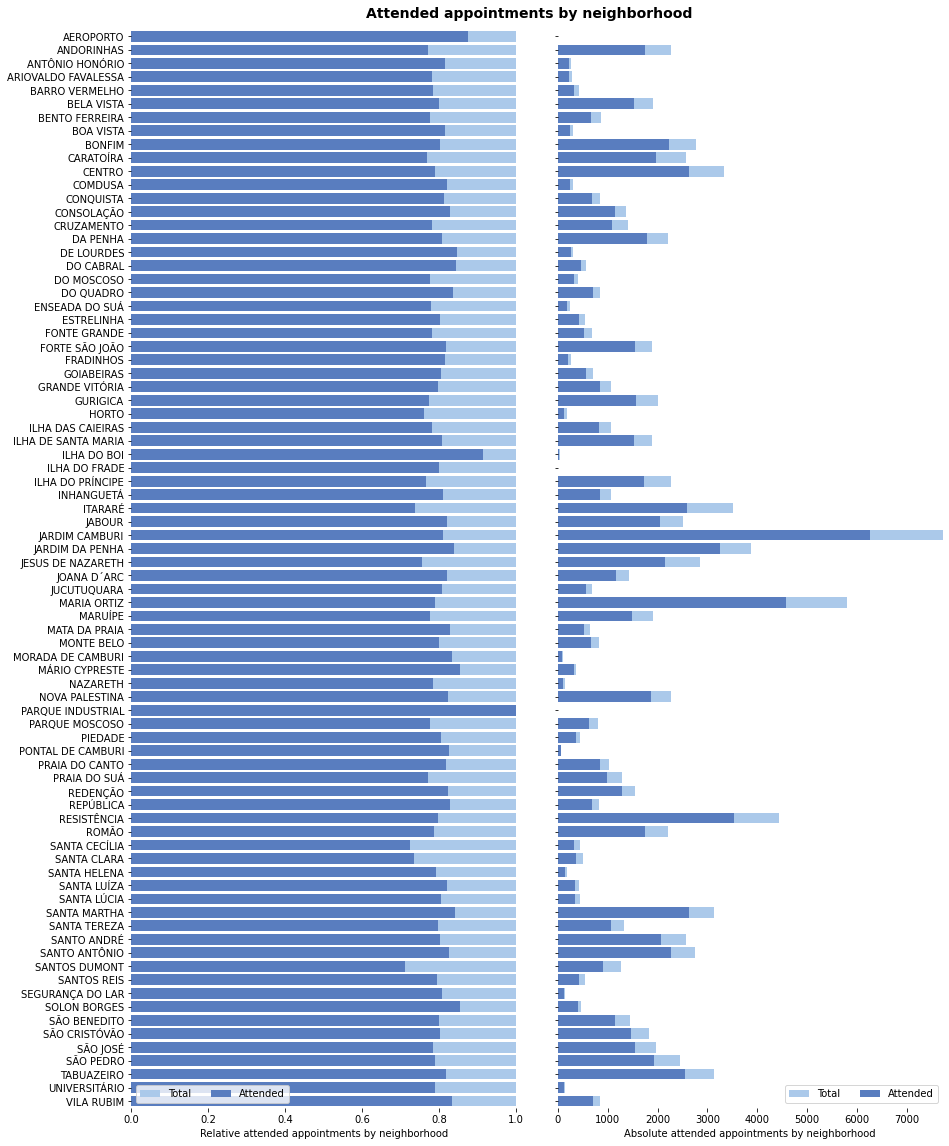

In [96]:
## Initialize the matplotlib figure:
fig2, (ax1, ax2) = plt.subplots(1,2, figsize=(12,16), sharey=False)
fig2.tight_layout()  #When working with 'tight_layout', the subplot must be adjusted [https://stackoverflow.com/questions/7066121/how-to-set-a-single-main-title-above-all-the-subplots-with-pyplot]
fig2.subplots_adjust(top=0.96)  #Adjusting the space for the superior title

## Plot the relative absence by neighborhood
#Total appointments
sns.set_color_codes("pastel")
sns.barplot(x="Total", y="Neighbourhood", data=normalNeighbor, label="Total", color="b", ax=ax1)
#Attended appointments
sns.set_color_codes("muted")
sns.barplot(x="No", y="Neighbourhood", data=normalNeighbor, label="Attended", color="b", ax=ax1)
## Add a legend and informative axis label
ax1.legend(ncol=2, loc="lower left", frameon=True)
ax1.set(xlim=(0, 1), ylabel="", xlabel="Relative attended appointments by neighborhood")
sns.despine(left=True, bottom=True,ax=ax1)

## Plot the absolute absence by neighborhood
#Total appointments
sns.set_color_codes("pastel")
sns.barplot(x="Total", y="Neighbourhood", data=neighbors_I, label="Total", color="b",ax=ax2)
#Attended appointments
sns.set_color_codes("muted")
sns.barplot(x="No", y="Neighbourhood", data=neighbors_I, label="Attended", color="b", ax=ax2)
## Add a legend and informative axis label
ax2.legend(ncol=2, loc="lower right", frameon=True)
ax2.set(xlim=(0, 7720), ylabel="", xlabel="Absolute attended appointments by neighborhood")  #The xlim value comes from the maximum value in the dataset.
ax2.set_yticklabels([''])
sns.despine(left=True, bottom=True, ax=ax2)

plt.suptitle('Attended appointments by neighborhood', fontsize=14, fontweight='bold')
plt.show()

From the analyzed data we found out that 80% of the appointments are attended to, with a standard deviation of 3.8%. The distribution of this numbers are easily perceived on the charts above. The chart representing the absolute values (the right one) is important to avoid biased interpretations: the neighborhood *Parque Industrial* had attended all its appointments but the same neighborhood carries the lowest number of appointments.

#### (ii) Relative absence: neighborhoods versus waiting categories
The main purpose of this analysis is to check if the no-showing rate increases as the waiting gets longer along all the considered geographical locations. In order to get to this we will make use of a *heatmap*, which in turn is an array where the columns represent one attribute and the rows represent another. The value of each cell represents the correlation between these attributes and, for ease of viewing, is converted to a color map <a href="#[9]">[9]</a>. In our case, the columns represent the *waiting time categories* while the rows represent the *neighborhoods*. The value (or color) of each cell represents the percentage of no-showing appointments.

In [97]:
## Using the pandas.groupby() method to produce a pivot table:
neighbors_II = dataset.groupby(by=['Neighbourhood','No_show']).WaitingCategories.value_counts().sort_index()

In [98]:
## Manipulating the data:
neighbors_II = neighbors_II.unstack(1).unstack()  #Converting the groupby object into a dataset
neighbors_II.fillna(value=0, inplace=True)  #Replacing NaN values by zero
neighbors_II = df_row_normalize(neighbors_II)  #Normalizing its values by the total of each row
neighbors_II = neighbors_II['Yes']  #Keeping only the values related to the absence
## Converting the normalized float values to percentual int values:
neighbors_II = (neighbors_II*100).astype('int64')
neighbors_II = neighbors_II.reindex(columns=['Same day: 0', 'Short: 1-3', 'Week: 4-7', 'Fortnight: 8-15', 'Month: 16-30', 'Quarter: 31-90', 'Semester: 91-180'])

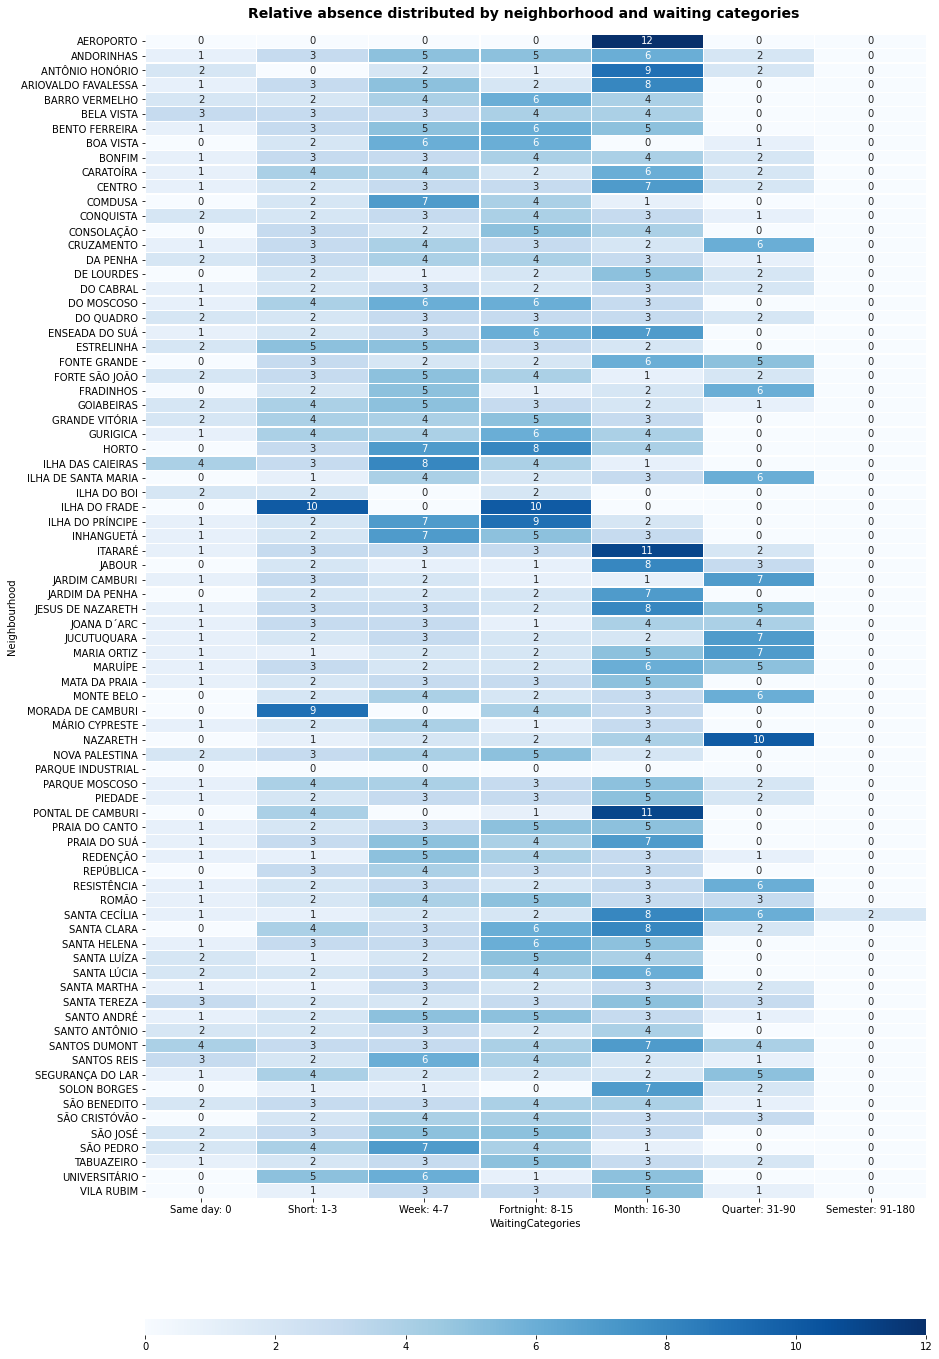

In [99]:
# Drawing a heatmap with the numeric values in each cell
fig3, ax = plt.subplots(figsize=(14, 25))
fig3.subplots_adjust(top=.965)
plt.suptitle('Relative absence distributed by neighborhood and waiting categories', fontsize=14, fontweight='bold')

cbar_kws = {'orientation':"horizontal", 'pad':0.08, 'aspect':50}
sns.heatmap(neighbors_II, annot=True, fmt='d', linewidths=.3, ax=ax, cmap='Blues', cbar_kws=cbar_kws,square=False);

It can be drawn from the heatmap above that in general the no-showing rate increases as the waiting gets longer for most of neighborhood, besides slightly different for each local. Some neighborhoods have higher no-showing rates even for short waiting times (e.g. *Ilha do Frade* and *Morada de Camburi*).  

From these insights, it would be reasonable for the public administration of these localities to investigate the reasons for such occurrences by collecting more detailed data and conducting deeper analysis.

<a id='EDA_question2'></a>
### 3.2. Exploring the patient profiles
After understanding the characteristics of the missed appointments, as explored in the last section, we will now analyze the patient profiles driven by the following questions:
* How the *no-shows* are distributed among the patients? 
* Is there any common characteristics among those patients that miss appointments?
* Patients suffering from serious illnesses are more assiduous?

Since we are now interested in the patients attribute that could characterize and differentiate those who attends to appointments from those who does not, we will first manipulate the dataset to show only the relevant information.

In [101]:
## Defining a new dataframe from the attributes of interest:
patients = dataset[['Gender','Age','Scholarship','Hypertension','Diabetes',
                    'Alcoholism','Handicap','WaitingCategories','SMS_received','No_show']]

By using *pandas.groupby()* method we could extract the relation among *waiting categories* and the patient attributes like *age, hipertension, diabetes* and so forth, primarily separated among the *No_show* classes. This task is easily accomplished by the *sum()* method, except for the *Age* attribute which must be calculated by the *mean()* method.

In [102]:
## Obtaining an statistical overview of all the attributes:
patients.groupby(by=['No_show','WaitingCategories']).describe()

Age                                          \
                             count       mean        std  min    25%   50%   
No_show WaitingCategories                                                    
No      Same day: 0        36770.0  34.747648  23.275342  0.0  15.00  34.0   
        Short: 1-3         11316.0  43.441322  22.996905  0.0  25.00  47.0   
        Week: 4-7          13097.0  40.951057  22.738829  0.0  22.00  43.0   
        Fortnight: 8-15     9362.0  36.772805  22.674522  0.0  18.00  36.0   
        Month: 16-30       10709.0  37.680456  23.145006  0.0  18.00  38.0   
        Quarter: 31-90      6792.0  39.727326  23.501633  0.0  20.00  42.0   
        Semester: 91-180     161.0  63.248447  24.794160  0.0  52.00  71.0   
Yes     Same day: 0         1792.0  28.392299  21.207981  0.0  12.00  21.0   
        Short: 1-3          3359.0  39.450729  22.604173  0.0  20.00  40.0   
        Week: 4-7           4413.0  36.433265  21.641937  0.0  20.00  35.0   
        Fortnight: 8-15     4166.0  32.448392  21.414294  0.0  16.00  30.0   
        Month: 16-30        5157.0  33.036843  21.210556  0.0  16.00  31.0   
        Quarter: 31-90      3369.0  33.519442  22.396125  0.0  14.00  32.0   
        Semester: 91-180      56.0  53.714286  27.043207  0.0  41.75  59.5   

                                        Scholarship            ... Handicap  \
                             75%    max       count      mean  ...      75%   
No_show WaitingCategories                                      ...            
No      Same day: 0        53.00  115.0     36770.0  0.107289  ...      0.0   
        Short: 1-3         61.00  102.0     11316.0  0.076264  ...      0.0   
        Week: 4-7          59.00   97.0     13097.0  0.086585  ...      0.0   
        Fortnight: 8-15    54.00  115.0      9362.0  0.104251  ...      0.0   
        Month: 16-30       56.00  100.0     10709.0  0.090018  ...      0.0   
        Quarter: 31-90     58.00   98.0      6792.0  0.057715  ...      0.0   
        Semester: 91-180   82.00   94.0       161.0  0.055901  ...      0.0   
Yes     Same day: 0        44.00   97.0      1792.0  0.136719  ...      0.0   
        Short: 1-3         57.00  115.0      3359.0  0.095862  ...      0.0   
        Week: 4-7          53.00   95.0      4413.0  0.119420  ...      0.0   
        Fortnight: 8-15    48.00   98.0      4166.0  0.140663  ...      0.0   
        Month: 16-30       48.00   95.0      5157.0  0.115765  ...      0.0   
        Quarter: 31-90     51.00  115.0      3369.0  0.087860  ...      0.0   
        Semester: 91-180   76.25   95.0        56.0  0.089286  ...      0.0   

                               SMS_received                                \
                           max        count      mean       std  min  25%   
No_show WaitingCategories                                                   
No      Same day: 0        1.0      36770.0  0.000000  0.000000  0.0  0.0   
        Short: 1-3         1.0      11316.0  0.063008  0.242988  0.0  0.0   
        Week: 4-7          1.0      13097.0  0.617775  0.485950  0.0  0.0   
        Fortnight: 8-15    1.0       9362.0  0.605853  0.488693  0.0  0.0   
        Month: 16-30       1.0      10709.0  0.630124  0.482793  0.0  0.0   
        Quarter: 31-90     1.0       6792.0  0.643698  0.478941  0.0  0.0   
        Semester: 91-180   1.0        161.0  0.633540  0.483340  0.0  0.0   
Yes     Same day: 0        1.0       1792.0  0.000000  0.000000  0.0  0.0   
        Short: 1-3         1.0       3359.0  0.057458  0.232750  0.0  0.0   
        Week: 4-7          1.0       4413.0  0.578065  0.493924  0.0  0.0   
        Fortnight: 8-15    1.0       4166.0  0.541287  0.498352  0.0  0.0   
        Month: 16-30       1.0       5157.0  0.552453  0.497289  0.0  0.0   
        Quarter: 31-90     1.0       3369.0  0.563669  0.496003  0.0  0.0   
        Semester: 91-180   1.0         56.0  0.660714  0.477752  0.0  0.0   

                                          
       

In [103]:
## Grouping by classes and waiting categories and calculating the instances sum:
patients_sum = patients.groupby(by=['No_show','WaitingCategories']).sum()
## Grouping by classes and waiting categories and calculating the instances sum:
patients_mean = patients.groupby(by=['No_show','WaitingCategories']).mean()

In [104]:
## Adjusting the 'Age' attribute to have the mean instead of sum values:
patients = patients_sum.copy()
patients['Age'] = patients_mean['Age']

In [105]:
## Normalizing data using the predefined function
patients = df_column_normalize(patients, percent=True)

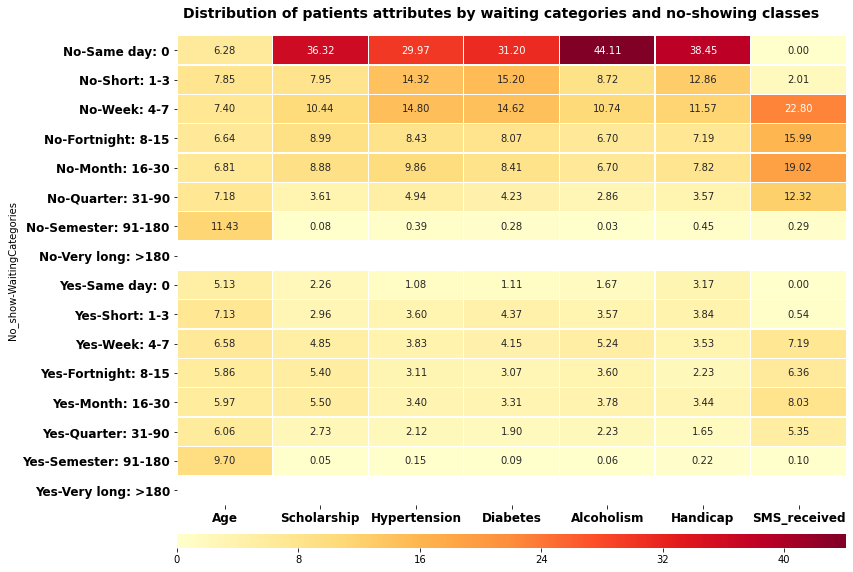

In [106]:
# Drawing a heatmap with the numeric values in each cell
fig4, ax = plt.subplots(figsize=(12, 10))
fig4.subplots_adjust(top=.94)
plt.suptitle('Distribution of patients attributes by waiting categories and no-showing classes', fontsize=14, fontweight='bold')

ax.set_yticklabels(ax.get_yticklabels(), ha="right", fontsize=12, weight='bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, weight='bold')

cbar_kws = {'orientation':"horizontal", 'pad':0.05, 'aspect':50}
sns.heatmap(patients, annot=True, fmt='.2f', linewidths=.3, ax=ax, cmap='YlOrRd', cbar_kws=cbar_kws);

From the heatmap and descriptive statistics above the following conclusions can be drawn:
* The patients who attend to the appointments are in general older than those who don't.
* Most of the patients **who attend** the appointments scheduled in the **same day** receives *scholarship* and presents *hipertension, diabetes, alcoholism*, and *handicap*. These data may indicate these group of patients (i) may not have access to scheduling systems; or (ii) may need emergency care more often.
* Patients suffering from hypertension and diabetes are more assiduous in relation to medical appointments. 
* Most **patients who have received SMS (70%) have attended to appointments scheduled from a week to a quarter**.

-----------

<a id='conclusions'></a>
## 4. Conclusions
This analysis sought to explore the medical appointment no-shows dataset, available in <a href="#[2]">[2]</a>, containing more than <em>110,000</em> appointments and of which approximately 30% of the patients have not attended. In this way, the data exploration presented in this notebook had the purpose to show up some insights on the possible causes of this appointment missing. It is important to notice, though, that with the provided data and the applied methods it is not possible to affirm any statement with statistical validity nor causal relations. On the other hand, the insights obtained through this analysis can, instead, inform and direct in-depth research on the subject, in order to validate the causes of the appointment missing and find ways to eradicate them.

----------
<a id='sec4.1'></a>
### 4.1. Analysis limitations

This section aims to expose some limitations and challenges faced during the data analysis process in order to help improving the data for further analysis:

* **Concerning data acquisition**:  
The dataset description affirms it comes from public health units from a specific municipality in Brazil. There are some data issues, though, that should be clarified: 
    * There is no description on how the data were acquired;
    * There is no description on how the patients ID were anonymized;
    * It is not known if the health units share the same patient database. From this it follows that is not possible to know if the same patient receives different identification codes when he/she goes to a different health unit.  
    

* **Concerning the data scope**:  
There are some references in the data source to the Brazilian health system (SUS) although the provided data are only related to municipal health units from *Vitória, ES*. As exposed in Section 1.2, the SUS is very heterogeneous and concerns to a country with almost 200 million people. In this way, it is not possible to infer the no-showing causes or to generalize any rules from this data.  
Besides that, there are some inconsistencies regarding the *Neighborhood* attribute. In the data description and in some forum comments it is said this attribute refers to the health unit location. However it is late stated it comes from 45 health units (against 80 unique neighborhood names). For last, it should be provided more details about the health unit and patients working and residence addresses, which in turn could allow in-depth analysis associating the displacement habits of each patient as well as the socioeconomic characteristics of each neighborhood. 


* **Concerning the data quality**:
    * Besides there were few data to be cleaned in the provided dataset, some of them suggest a process issue that should be verified in the case of an in-depth research. To cite some identified in this analysis: *negative age*; *scheduling date older than appointment date*.


* **Concerning the data analysis**:
Given the above, the present analysis was limited to categorizing the patient waiting time and exploring the associations of these categories with other attributes. Nevertheless, it was possible to provide relevant insights that could lead to a controlled data acquisition for future researches on this topic.

-------------
<a id='sec4.2'></a>
### 4.2. Analysis overview

In the <a href="#intro">Introduction</a> section of this notebook we have formulated some questions that have driven this analysis. We will now present the insights gained from the data exploration for each of them.

* **Regarding the no-showing appointments**:
  - Do the patients forget the appointment?
  - What is the average waiting time between the scheduling date and the appointment date?

<span style="color:blue"> From the chart below it can be seen that probably people forget the appointment, since **the no-showing rate increases as the waiting time gets longer**. As it can be seen by the red line in the chart, the no-showing rate reaches its lower value when the attendance occurs in the same day it was scheduled. We can then associate it with the emergency care or even when the patient goes to the health unit without a previously scheduling. <br>   

It is curious to notice that after one quarter waiting there is a slight return to the patient assiduity, when the *no-showing rate* downs from *49.6%* to *%34.78*. From the analysis in Section 3.1.2, I *hypothesized* that the gradual rising of No-Show rate percentage from every category of waiting days has reduced slightly and deviated from its increasing trend at the last category may be attributed to its patient profile: **elderly people as well as those with chronic diseases who require regular medical follow-up tend to schedule long-term appointments and attend to them and hence, it'd possibly be the reason why the rising trend we have observed in the above made figure is deviated at this category.**<br>  

For last, considering the whole dataset the average waiting is of *10.18 days* with a standard deviation of *15.25 days*.

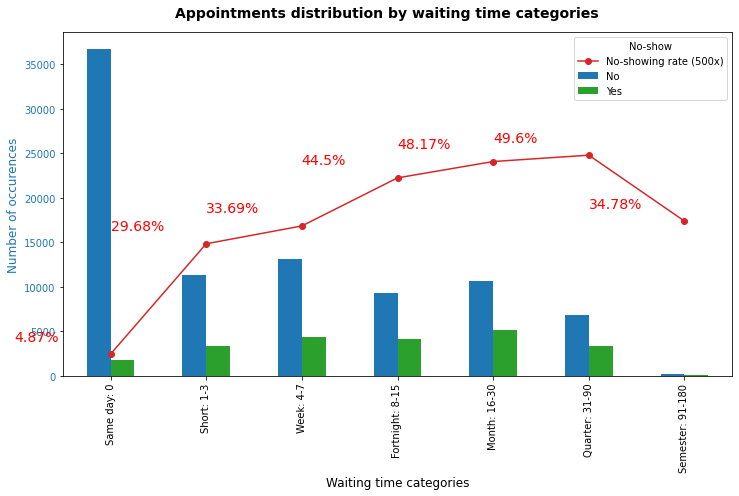

In [107]:
fig1 ##This chart was generated in Section 3.1.1

--------------

* **Regarding the patient profile**:
  - Is there any common characteristics among those patients that miss appointments?
  - What is the *missing appointments per patient* relation in the dataset?  
  - How many patients have missed an appointment at least once?
  - Patients suffering from serious illnesses are more assiduous?

<span style="color:blue"> The possible answers for these questions were explored at Section 3.2 and comes from descriptive statistics, as those shown in the heatmap below. The following conclusions could be drawn:  
<ul>
<li>The patients who attend to the appointments are in general older than those who don't.
<li>Most of the patients <strong>who attend</strong> the appointments scheduled in the <strong>same day</strong> receives <em>scholarship</em> and presents <em>hypertension</em>, <em>diabetes</em>, <em>alcoholism</em>, and <em>handicap</em>. These data may indicate these group of patients (i) may not have access to scheduling systems; or (ii) may need emergency care more often.
<li>Patients suffering from hypertension and diabetes are more assiduous in relation to medical appointments. 
<li>Most <strong>patients who have received SMS (70%) have attended to appointments scheduled from a week to a quarter.</strong>

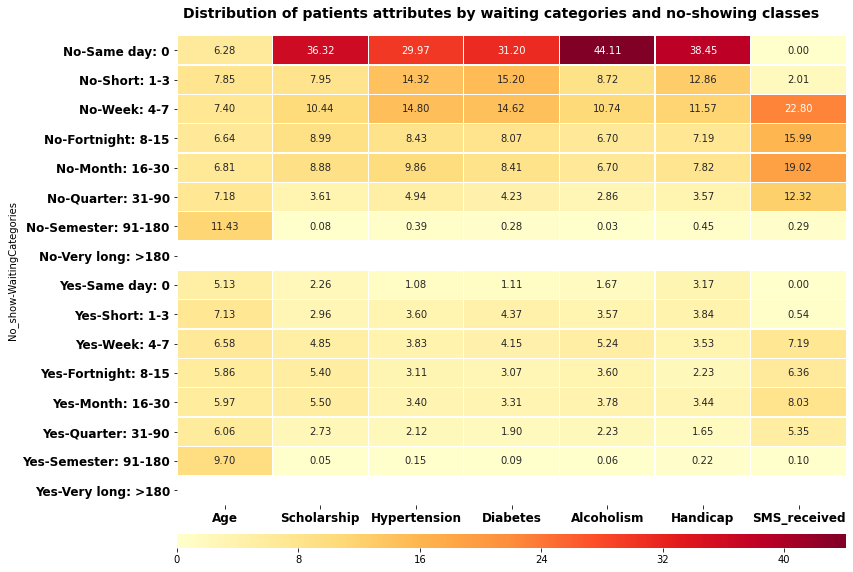

In [108]:
fig4 ##This chart was generated in Section 3.2

--------------

* **Regarding the health unit**:
  - What are the neighbourhoods with the highest no-showing rate?
  - Considering there are common characteristics among those who do not attend the appointments, how these characteristics are geographically distributed?
  

<span style="color:blue"> These questions are directly answered by the three charts below. From the analyzed data we found out that 80% of the appointments are attended to, with a standard deviation of 3.8%, and the geographical  distribution of this number is easily perceived on the bar charts below. The neighborhood with the highest relative no-showing rate is *Santos Dumont*.</span><br>  

From the heatmap it can be drawn that in general the no-showing rate increases as the waiting gets longer for most of neighborhood, besides slightly different for each local. Some neighborhoods have higher no-showing rates even for short waiting times (e.g. *Ilha do Frade* and *Morada de Camburi*).<br>  

From these insights, it would be reasonable for the public administration of these localities to investigate the reasons for such occurrences by collecting more detailed data and conducting deeper analysis.

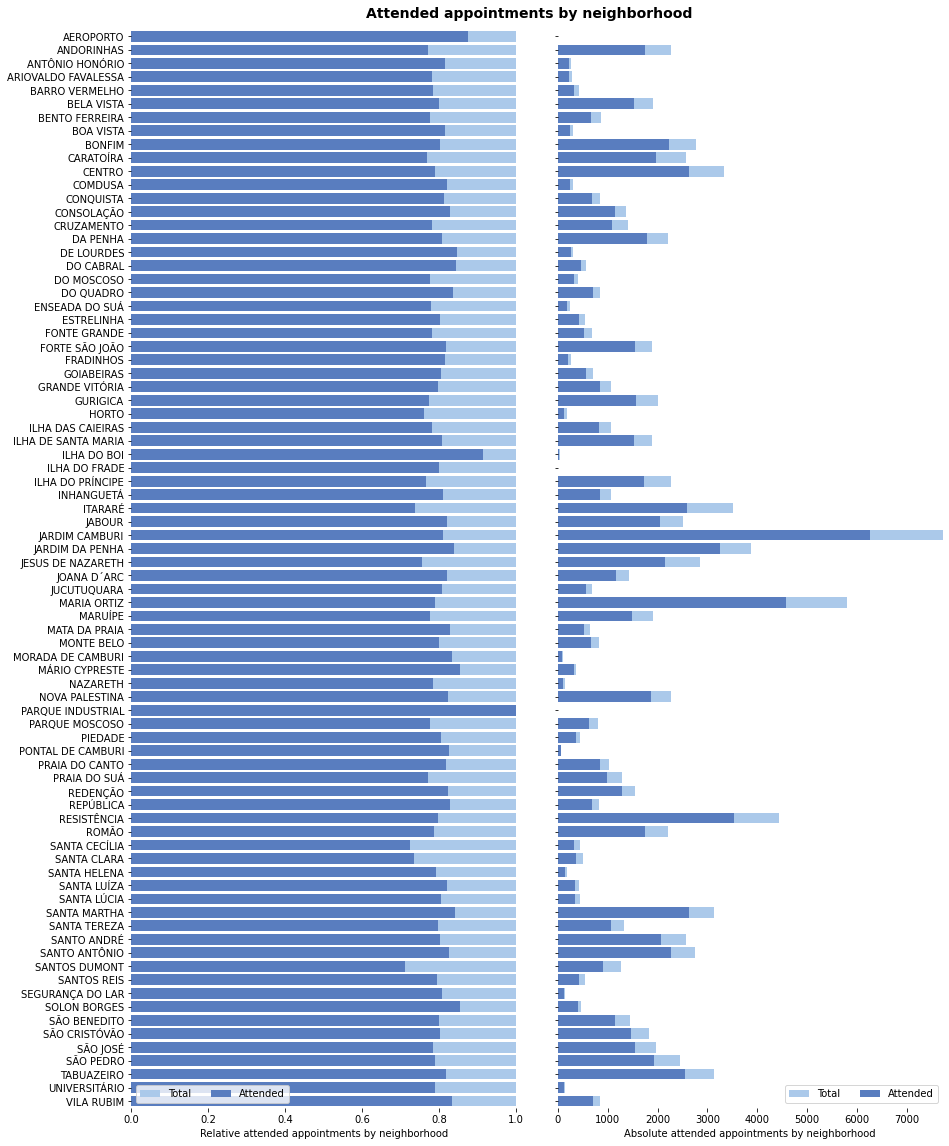

In [109]:
fig2 ##This chart was generated in Section 3.1.3

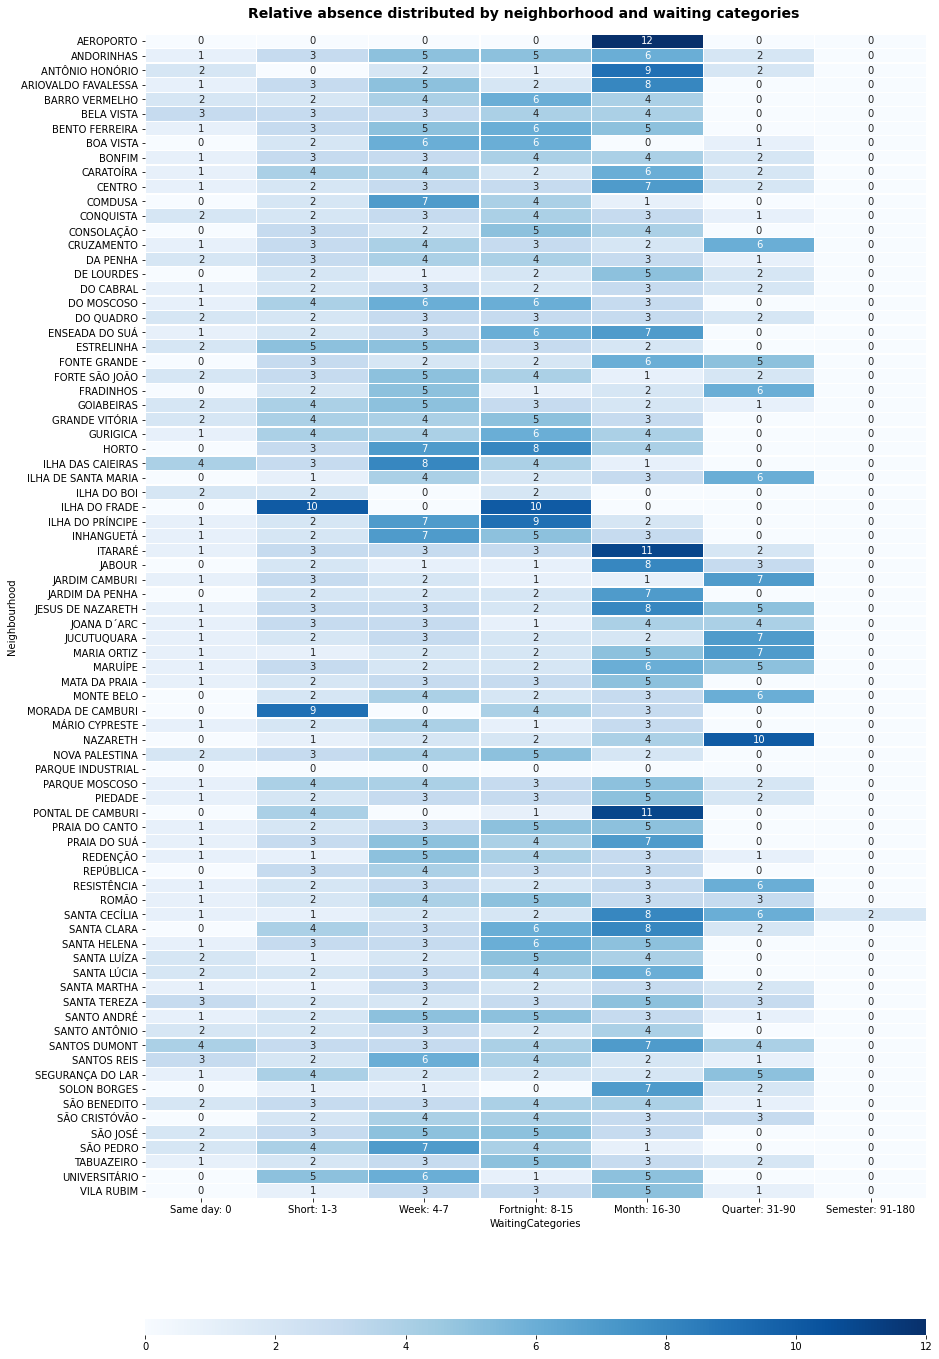

In [110]:
fig3 ##This chart was generated in Section 3.1.3

--------------

* **Regarding the data**:
  - Is the data balanced in relation to the interest class (showing/no-showing to appointments)?
  - How is the data distributed in relation to the location (neighborhood)? I.e. all the units have an equivalent and balanced number of instances?
  


<span style="color:blue"> As it was identified in Sections 2.3.1 and 2.3.5, the data are unbalanced in relation to *gender* attribute, as well as to the *No_showing* class. From the *absolute attended appointments bar chart* above it is also clear the data are unbalanced in relation to the health units. 

--------------

<a id='references'></a>
## References

<a id='[1]'></a>[1] Wikipedia contributors. Brazil. Wikipedia, The Free Encyclopedia. February 9, 2018, 22:06 UTC. Available at: https://en.wikipedia.org/w/index.php?title=Brazil&oldid=824851232. 

<a id='[2]'></a>[2] Kaggle. *Medical Appointment No Shows*. Reviewed dataset. Available at: https://www.kaggle.com/joniarroba/noshowappointments.

<a id='[3]'></a>[3] Victora, C. G., Barreto, M. L., Leal, M. D. C., Monteiro, C. A., Schmidt, M. I., Paim, J. S., ... & Reichenheim, M. E. (2011). *Condições de saúde e inovações nas políticas de saúde no Brasil: o caminho a percorrer* (in Portuguese). Available at: https://repositorio.ufba.br/ri/handle/ri/5973. 

<a id='[4]'></a>[4] Pandas 0.22.0 documentation. Available at: https://pandas.pydata.org/pandas-docs/stable/timeseries.html. 

<a id='[5]'></a>[5] Twelve useful Pandas techniques in Python for data manipulation. Analytics Vhidya. Available at: https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/. 

<a id='[6]'></a>[6] Stack Overflow. Plot pandas DataFrame as bar and line on the same one chart. Available at https://stackoverflow.com/questions/23482201/plot-pandas-dataframe-as-bar-and-line-on-the-same-one-chart. 

<a id='[7]'></a>[7] Stack Overflow. Writing numerical numerical values on the plot with Matplotlib. Available at https://stackoverflow.com/questions/6282058/writing-numerical-values-on-the-plot-with-matplotlib. 

<a id='[8]'></a>[8] Wikipedia contributors. *Lista de Bairros de Vitória*. Available at: https://pt.wikipedia.org/wiki/Lista_de_bairros_de_Vit%C3%B3ria. 

<a id='[9]'></a>[9] Matplotlib. Colorbar API. Version 2.1.2. Available at https://matplotlib.org/api/colorbar_api.html. 